In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
score = pd.read_csv('critic.csv', header=0, index_col=0)
score

,Lady in the Water,Snake on a Plane,Just My Luck,Superman Returns,"You, Me and Dupree",The Night Listener
Lisa Rose,2.5,3.5,3.0,3.5,2.5,3.0
Gene Seymour,3.0,3.5,1.5,5.0,3.5,3.0
Michael Philips,2.5,3.0,0.0,3.5,0.0,4.0
Claudia Puig,0.0,3.5,3.0,4.0,2.5,4.5
Mick LasSalle,3.0,4.0,2.0,3.0,2.0,3.0
Jack Matthews,3.0,4.0,0.0,5.0,3.5,3.0
Toby,0.0,4.5,0.0,4.0,1.0,0.0


In [3]:
def cliff(X):
    return np.round(X, 2)

# 指定k随机生成两个分解矩阵
R = np.array(score)
user_len = len(R)
item_len = len(R[0])

k = 3
U = cliff(np.random.randn(user_len, k))
V = cliff(np.random.randn(item_len, k))

In [4]:
def update(R, U, V, num_epochs=2000, lr=0.001, lamda=0.1, epsilon=1e-2):
    loss = []
    for num_epoch in range(num_epochs):
        error = 0
        count = 0
        for i in range(len(R)):
            for j in range(len(R[0])):
                error_ij = R[i][j] - np.dot(U[i], V[j])
                if R[i][j] > 0:
                    U[i] = U[i] + lr * (error_ij * V[j] - lamda * U[i])
                    V[j] = V[j] + lr * (error_ij * U[i] - lamda * V[j])
                    error_ij = R[i][j] - np.dot(U[i], V[j])
                    error += error_ij ** 2
                    count += 1
        
        mse = np.sqrt(error) / count
        if mse < epsilon:
            print("经过", num_epoch, "次后收敛")
            break
        loss.append(mse)
    
    return np.dot(U, V.T), loss

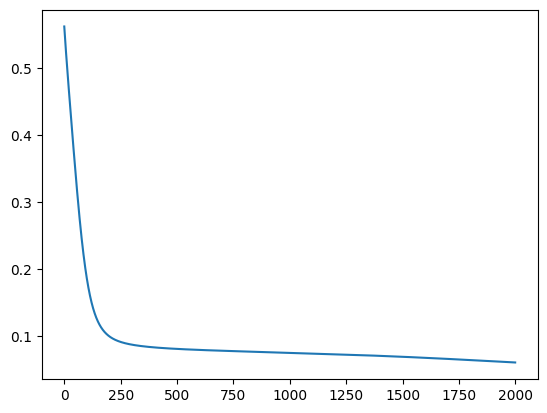

In [5]:
M, loss = update(R, U, V)
plt.plot(range(len(loss)), loss)
M = np.round(M, 2)

In [6]:
dataFrame = pd.DataFrame(M, index=['Lisa Rose', 'Gene Seymour', 'Michael Philips', 'Claudia Puig', 
                                   'Mick LasSalle', 'Jack Matthews', 'Toby'],
                        columns=['Lady in the Water','Snake on a Plane','Just My Luck','Superman Returns',"You, Me and Dupree",'The Night Listener'])
dataFrame[dataFrame<0] = 0
dataFrame[dataFrame>5] = 5

In [7]:
score

,Lady in the Water,Snake on a Plane,Just My Luck,Superman Returns,"You, Me and Dupree",The Night Listener
Lisa Rose,2.5,3.5,3.0,3.5,2.5,3.0
Gene Seymour,3.0,3.5,1.5,5.0,3.5,3.0
Michael Philips,2.5,3.0,0.0,3.5,0.0,4.0
Claudia Puig,0.0,3.5,3.0,4.0,2.5,4.5
Mick LasSalle,3.0,4.0,2.0,3.0,2.0,3.0
Jack Matthews,3.0,4.0,0.0,5.0,3.5,3.0
Toby,0.0,4.5,0.0,4.0,1.0,0.0


In [8]:
dataFrame

,Lady in the Water,Snake on a Plane,Just My Luck,Superman Returns,"You, Me and Dupree",The Night Listener
Lisa Rose,2.59,3.31,2.17,3.70,2.43,2.99
Gene Seymour,2.85,3.51,2.40,4.21,3.12,3.09
Michael Philips,2.38,3.05,2.30,3.59,1.96,3.60
Claudia Puig,2.85,3.64,2.60,4.21,2.51,3.87
Mick LasSalle,2.70,3.69,1.95,3.37,1.88,2.75
Jack Matthews,3.02,3.72,2.63,4.53,3.26,3.49
Toby,3.00,4.28,2.32,3.67,1.36,3.80


In [9]:
rank = dataFrame.iloc[-1].sort_values(ascending=False)
rank

Snake on a Plane      4.28
The Night Listener    3.80
Superman Returns      3.67
Lady in the Water     3.00
Just My Luck          2.32
You, Me and Dupree    1.36
Name: Toby, dtype: float64